## Programming part of Homework 2 (Data Structures, Fall 2024)

### Programming problem 1
Consider the problem of finding the binary representation of a positive decimal integer Problem 1. Please use Python to implement the pseudo-code you provide for solving the problem. You should provide the iterative and recursive functions named with `Dec_to_Bin_Ite()` and `Dec_to_Bin_Rec()` respectively. Then, perform a comparison on these two versions by measuring the execution time. Besides, we also consider the number of recursive calls made in the recursive approaches. Hence, you need to
1. implement the iterative approach as a function named as `Dec_to_Bin_Ite()`,
2. provide the recursive version for the approach named as `Dec_to_Bin_Rec()`, and
3. compare these two function with the same input in terms of running time and write what you have observed.

We will use an in-built python library `timeit` and the module function `timeit.timeit()` for measuring the running time respective. In you observation, please indicate the ways to measure the time and this will be provided in the template.

**Note:** For the programming problems, please do some experiments by yourself to observe the running time and the number of recursive calls. You need to report what you have observed from the experiments when you submit your homework.

In [133]:
def Dec_to_Bin_Ite(n):
  if n == 0 :
    return "0"
  
  binary = ""
  while n > 0:
    remainder = n % 2
    n = n //2
    binary = str(remainder)+ binary
  return binary

print(Dec_to_Bin_Ite(10))
print(Dec_to_Bin_Ite(19))
print(Dec_to_Bin_Ite(63))

1010
10011
111111


In [134]:
def Dec_to_Bin_Rec(n):
  if n == 0 :
    return 0
  
  if n == 1:
    return 1
  
  return Dec_to_Bin_Ite(n//2) + str(n%2)

    
print(Dec_to_Bin_Rec(10))
print(Dec_to_Bin_Rec(19))
print(Dec_to_Bin_Rec(63))

1010
10011
111111


In [135]:
#---------------------------------------------------------timeit
import timeit as ti
n=100000000000
#---------------------------------------------------------Method 1
# print("Running time comparison (Timer Method 1):")

tstart = ti.default_timer() #timer start 計時器開啟
for i in range(10000):
    Dec_to_Bin_Ite(n)
tend = ti.default_timer() #timer end計時器關閉
t_ite=tend - tstart#開始與結束的差值

tstart = ti.default_timer() #timer start 計時器開啟
for i in range(10000):
    Dec_to_Bin_Rec(n)
tend = ti.default_timer() #timer end計時器關閉
t_rec=tend - tstart#開始與結束的差值

print("Iterative on ", n)
print("iterative approach:", t_ite)
print("Recursive approach:", t_rec)

#---------------------------------------------------------Method 2
# print("Running time comparison (Timer Method 2):")

def iterative_test():
    Dec_to_Bin_Ite(n)
    
def recursive_test():
    Dec_to_Bin_Rec(n)
    
t_ite = ti.timeit("iterative_test()", setup="from __main__ import iterative_test", number = 10000)#timeit(函數名稱,執行次數)
t_rec = ti.timeit("recursive_test()", setup="from __main__ import recursive_test", number = 10000)

print("Iterative on ", n)
print("iterative approach:", t_ite)
print("Recursive approach:", t_rec)


Iterative on  100000000000
iterative approach: 0.1280457000248134
Recursive approach: 0.10497470002155751
Iterative on  100000000000
iterative approach: 0.09769879991654307
Recursive approach: 0.10168600000906736


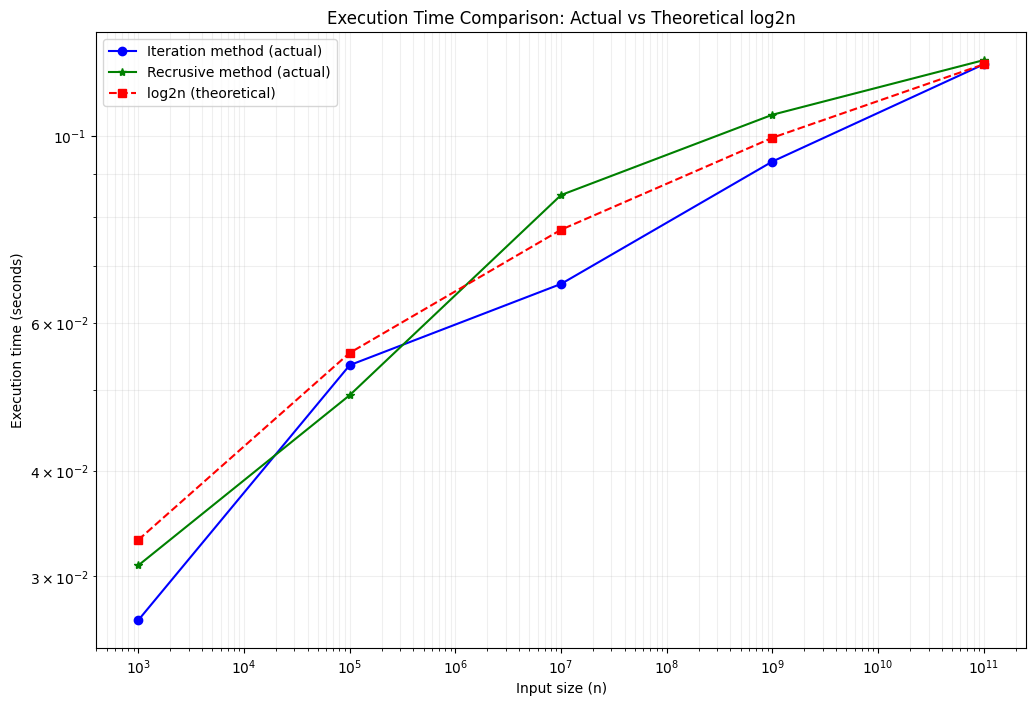

In [142]:
# 繪製圖形比較
import matplotlib.pyplot as plt
import numpy as np

inputs = [1000, 100000, 10000000, 1000000000, 100000000000]
execution_times_ite = [0.026629, 0.053441, 0.066722, 0.093220, 0.121584] 
execution_times_rec = [0.030926, 0.049234, 0.085062, 0.105929, 0.122974]


# 預計產生的log2n
def log2n(n):
    return np.log2(n)

# 計算 log2n 值，並按照比例進行縮放
log2n_values = [log2n(n) for n in inputs]
scale_factor = execution_times_ite[-1] / log2n_values[-1]
scaled_log2n_values = [v * scale_factor for v in log2n_values]

plt.figure(figsize=(12, 8))

# 方法一實驗的時間用藍色圓點
plt.plot(inputs, execution_times_ite, 'bo-', label='Iteration method (actual) ')

# 方法二實驗的時間用綠色星
plt.plot(inputs, execution_times_rec, 'g*-', label='Recrusive method (actual)')

# log2n的值用紅色正方型
plt.plot(inputs, scaled_log2n_values, 'rs--', label='log2n (theoretical)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Input size (n)')
plt.ylabel('Execution time (seconds)')
plt.title('Execution Time Comparison: Actual vs Theoretical log2n')

# 圖例
plt.legend()

plt.grid(True, which="both", ls="-", alpha=0.2)

plt.show()

#### Please write down the observations you have after the comparisons:

##### Inputs (values of n) for five experiments
1. 1,000
2. 100,000
3. 10,000,000
4. 1,000,000,000
5. 100,000,000,000
##### Results of comparisoms
*******************************************************************************************************
**Method 1**

| time          | time for exp1  | time for exp2  | time for exp3  | time for exp4  | time for exp5  |
| -----------   | -------------- | -------------- | -------------- | -------------- | -------------- |
|Iteration      |   0.031682     |   0.048731     |   0.063748     |   0.079606     |   0.106249     |
|Recursion      |   0.031323     |   0.046660     |   0.069531     |   0.080799     |   0.110389     |

**Method 2**

| time          | time for exp1  | time for exp2  | time for exp3  | time for exp4  | time for exp5  | 
| -----------   | -------------- | -------------- | -------------- | -------------- | -------------- |
|Iteration      |    0.026629    |    0.053441    |   0.066722     |    0.093220    |    0.121584    |
|Recursion      |    0.030926    |    0.049234    |   0.085062     |    0.105929    |    0.122974    |

*******************************************************************************************************

##### Observations
+ 在迴圈方法**Dec_to_Bin_Ite**，迭代的次數取決於n要除以幾次二才會達到0，時間複雜度為O(n) = log2n ; 在遞迴方法**Dec_to_Bin_Rec**，每次使用遞迴都會將n除以2，使用遞迴的次數取決於將n除以2多少次才會到遞迴的base case，時間複雜度為O(n)=log2n。在實驗中假設的n彼此的級距相通，彼次相差100倍，再透過matplotlib繪圖，發現不管測試的時候用迴圈法還是遞迴法繪製的線型都趨近紅色虛線的log2n。<br>
+ 在大部分情況下迴圈方法執行的時間會比遞迴更少，主要可能記憶體空間的使用。在迴圈方法中，`binary`字串每次迭代中都會有變化，但只會保留作新的一個字串。但遞迴則會在每一個stack建立一個新的字串`str(n%2)`，且每次return的時候還會再建立一個新的字串來傳遞結果，所以會消耗更多記憶體，導致遞迴方法會比迭代方法還慢。<br>
+ 大部分情況下方法二消耗的時間比較長一點。<br>
  測試的時候方法一用**ti.default_timer()**來計算開始和結束的時間，比較直觀，可以自己控制範圍在任何地方計算時間，但可能受其他process影響比較不准。<br>
  方法二則使用**ti.timeit()**，timeit()為python內建用來測試運行時間，不需要自己控制開始和結束的時間，可以減少人為錯誤，且會隔離要測試的程式碼，得到的結果可能會更為可靠，而方法二會在`setup`這個參數建立要測試的環境，可能因為做一些定義函數的準備工作時多花了一點點時間。


### Programming problem 2
A ***permutation*** $P$ of size $n$ is a way of arranging the numbers between 1 and $n$, where each number must be used and can only be used once. For example, 5 4 1 2 3 is a permutation of 1 2 3 4 5 where $P(5)=1$, $P(4)=2$, $P(1)=3$, $P(2)=4$, and $P(3)=5$. An ***inversion*** in a permutation $P$ is a pair of numbers $i \mbox{ and} j \in\{1, \ldots, n\}$ with $i<j$ such that the larger number appears to the left of the smaller one in the permutation, that is $P(j)<P(i)$. In the example, the pair of (3, 5) is an inversion in $P$. The ***inversion number*** of a permutation is the total number of inversions. Please write the Python fuctions mentioned in Problem 4 and compare the performance in term of running time. The things to be provided are as below.
1. Implement the iterative approach using Python and name the function as `inversion_number_iterative()`.
2. Please implement the linear recursive version you provide in Problem 4(c) with the function name of `inversion\_number\_recursive()`.
3. Write the binary recursive version you provide in Problem 4(d) with the function named as `inversion\_number\_tworecurs()`.
4. Compare these functions with the same input in terms of running time and write what you have observed.

In [136]:
def inversion_number_iterative(P):
  inversion_number = 0
  for i in range(0,len(P)):
    for j in range(i+1,len(P)):
      if P[i] > P[j]:
        inversion_number += 1
  return inversion_number


# perm=[4, 6, 2, 5, 1, 3]
# perm = [12, 11, 13, 5, 6, 7]
perm=[35, 11, 26, 13, 64, 21, 44, 6, 100, 57, 77, 82]
print('The inversion number of ', perm, 'is', inversion_number_iterative(perm))

The inversion number of  [35, 11, 26, 13, 64, 21, 44, 6, 100, 57, 77, 82] is 19


In [137]:
def count_inversion(P, index):
    if index == len(P) - 1:
        return 0
    inversion_number = 0
    for i in range(index + 1, len(P)):
        if P[index] > P[i]:
            inversion_number += 1
    return inversion_number + count_inversion(P, index + 1)

def inversion_number_recursive(P):
  return count_inversion(P,0)


# perm=[4, 6, 2, 5, 1, 3]
# perm = [12, 11, 13, 5, 6, 7]
perm=[35, 11, 26, 13, 64, 21, 44, 6, 100, 57, 77, 82]
print('The inversion number of ', perm, 'is', inversion_number_recursive(perm))

The inversion number of  [35, 11, 26, 13, 64, 21, 44, 6, 100, 57, 77, 82] is 19


In [138]:
def merge_and_count(left, right):
    result = []
    inversion_count = 0
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            inversion_count += len(left) - i
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result, inversion_count

def count_inversions(arr):
    if len(arr) <= 1:
        return arr, 0
    mid = len(arr) // 2
    left_half, left_inversions = count_inversions(arr[:mid])
    right_half, right_inversions = count_inversions(arr[mid:])
    merged_array, split_inversions = merge_and_count(left_half, right_half)
    total_inversions = left_inversions + right_inversions + split_inversions
    return merged_array, total_inversions

def inversion_number_tworecurs(P):
    _, total_inversions = count_inversions(P)
    return total_inversions

# perm=[4, 6, 2, 5, 1, 3]
# perm = [12, 11, 13, 5, 6, 7]
perm=[35, 11, 26, 13, 64, 21, 44, 6, 100, 57, 77, 82]
print('The inversion number of', perm, 'is', inversion_number_tworecurs(perm))

The inversion number of [35, 11, 26, 13, 64, 21, 44, 6, 100, 57, 77, 82] is 19


In [140]:
#---------------------------------------------------------timeit
import timeit as ti

perm = [12, 11, 13, 5, 6, 7]
# perm = [67, 42, 13, 89, 55, 36, 21, 94, 78, 5, 62, 29, 83, 47, 11, 72, 39, 58, 16, 91, 25, 70, 3, 86, 50, 33, 19, 75, 44] 
# perm = [23, 15, 8, 31, 4, 19, 12, 27, 6, 11, 35, 2, 17, 29, 9] 
# perm = [2, 1, 3]
#---------------------------------------------------------Method 1
print("Running time comparison (Timer Method 1):")

tstart = ti.default_timer() #timer start 計時器開啟

for i in range(10000):
    inversion_number_iterative(perm)
tend = ti.default_timer() #timer end計時器關閉
t_ite=tend - tstart#開始與結束的差值

tstart = ti.default_timer() #timer start 計時器開啟
for i in range(10000):
    inversion_number_recursive(perm)
tend = ti.default_timer() #timer end計時器關閉
t_rec=tend - tstart#開始與結束的差值

tstart = ti.default_timer() #timer start 計時器開啟
for i in range(10000):
    inversion_number_tworecurs(perm)
tend = ti.default_timer() #timer end計時器關閉
t_twr=tend - tstart#開始與結束的差值

print("Permutation:", perm)
print('The inversion number of is', inversion_number_iterative(perm),'(iterat)')
print('The inversion number of is', inversion_number_recursive(perm),'(linear)')
print('The inversion number of is', inversion_number_tworecurs(perm),'(binary)')

print("Iterative approach:", t_ite)
print("Recursive approach:", t_rec)
print("Binrecurs approach:", t_twr)

#---------------------------------------------------------Method 2
print("Running time comparison (Timer Method 2):")

def iterative_test():
    inversion_number_iterative(perm)

def recursive_test():
    inversion_number_recursive(perm)

def binrecurs_test():
    inversion_number_tworecurs(perm)
    
t_ite = ti.timeit("iterative_test()", setup="from __main__ import iterative_test", number = 10000)#timeit(函數名稱,執行次數)
t_rec = ti.timeit("recursive_test()", setup="from __main__ import recursive_test", number = 10000)
t_twr = ti.timeit("binrecurs_test()", setup="from __main__ import binrecurs_test", number = 10000)

print("Iterative approach:", t_ite)
print("Recursive approach:", t_rec)
print("Binrecurs approach:", t_twr)

Running time comparison (Timer Method 1):
Permutation: [12, 11, 13, 5, 6, 7]
The inversion number of is 10 (iterat)
The inversion number of is 10 (linear)
The inversion number of is 10 (binary)
Iterative approach: 0.0352907000342384
Recursive approach: 0.052950500044971704
Binrecurs approach: 0.08509519998915493
Running time comparison (Timer Method 2):
Iterative approach: 0.02445689996238798
Recursive approach: 0.030660100048407912
Binrecurs approach: 0.0870479999575764


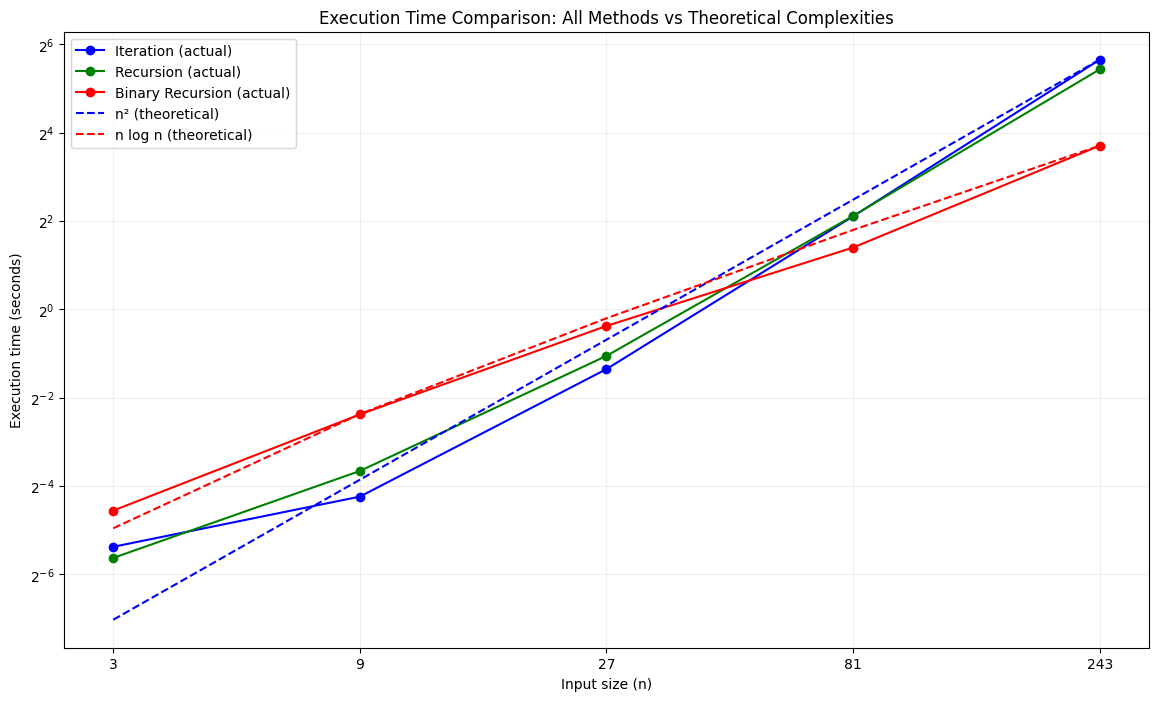

In [126]:
import matplotlib.pyplot as plt
import numpy as np

inputs = [3, 9, 27, 81, 243]
iteration_times = [0.024061, 0.052882, 0.391250, 4.304005, 50.264585]
recursion_times = [0.020209, 0.079105, 0.481461, 4.331691, 43.188642]
binrecurs_times = [0.042487, 0.192179, 0.770404, 2.635868, 13.033187]

def n_squared(n):
    return n ** 2

def n_log_n(n):
    return n * np.log2(n)

def scale_complexity(complexity_func, actual_times):
    values = [complexity_func(n) for n in inputs]
    scale_factor = actual_times[-1] / values[-1]
    return [v * scale_factor for v in values]

plt.figure(figsize=(14, 8))

plt.plot(inputs, iteration_times, 'bo-', label='Iteration (actual)')
plt.plot(inputs, recursion_times, 'go-', label='Recursion (actual)')
plt.plot(inputs, binrecurs_times, 'ro-', label='Binary Recursion (actual)')

plt.plot(inputs, scale_complexity(n_squared, iteration_times), 'b--', label='n² (theoretical)')
plt.plot(inputs, scale_complexity(n_log_n, binrecurs_times), 'r--', label='n log n (theoretical)')

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlabel('Input size (n)')
plt.ylabel('Execution time (seconds)')
plt.title('Execution Time Comparison: All Methods vs Theoretical Complexities')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.xticks(inputs, inputs)

plt.show()

#### Please write down the observations you have after the comparisons:
##### Inputs for five experiments 5 15 45 135 405
1. [2, 1, 3] - 3個元素<br>
2. [7, 3, 1, 8, 2, 5, 9, 4, 6] - 9個元素<br>
3. [26, 17, 15, 7, 2, 13, 24, 11, 20, 3, 14, 16, 23, 6, 5, 27, 9, 19, 12, 10, 21, 1, 22, 8, 18, 4, 25] - 27個元素 <br> 
4. [57, 76, 44, 64, 7, 78, 28, 49, 75, 23, 38, 80, 37, 35, 42, 32, 56, 72, 39, 33, 55, 24, 54, 69, 22, 48, 41, 70, 20, 25, 17, 65, 51, 2, 3, 21, 81, 47, 19, 52, 40, 30, 15, 66, 34, 43, 77, 60, 68, 46, 50, 36, 61, 13, 67, 59, 1, 26, 10, 18, 71, 58, 79, 8, 45, 62, 31, 11, 73, 9, 16, 74, 27, 63, 53, 29, 14, 4, 6, 12, 5] - 81個元素 <br> 
5. [142, 86, 192, 137, 202, 167, 205, 97, 185, 117, 32, 39, 161, 38, 169, 87, 138, 30, 147, 157, 11, 37, 112, 201, 128, 76, 23, 181, 134, 33, 177, 84, 164, 223, 240, 46, 70, 113, 98, 190, 228, 155, 31, 203, 42, 44, 216, 116, 121, 173, 43, 211, 124, 227, 143, 171, 65, 72, 168, 133, 221, 99, 45, 166, 74, 71, 154, 49, 41, 106, 48, 225, 52, 236, 183, 77, 108, 81, 163, 15, 114, 40, 93, 186, 149, 213, 103, 104, 101, 144, 242, 130, 54, 89, 105, 110, 131, 78, 136, 150, 191, 61, 233, 139, 180, 7, 210, 120, 241, 209, 159, 145, 56, 6, 18, 59, 156, 95, 235, 125, 172, 8, 100, 35, 217, 90, 51, 29, 179, 62, 200, 111, 73, 152, 218, 60, 107, 189, 208, 140, 126, 182, 47, 178, 119, 4, 5, 243, 132, 27, 193, 206, 58, 85, 222, 238, 66, 88, 212, 229, 91, 231, 1, 135, 237, 53, 165, 83, 148, 234, 215, 24, 16, 123, 102, 220, 34, 160, 184, 170, 129, 176, 96, 175, 2, 219, 50, 226, 36, 25, 198, 199, 17, 158, 22, 14, 187, 67, 80, 12, 115, 239, 197, 109, 79, 232, 94, 82, 174, 141, 13, 153, 194, 28, 146, 214, 224, 151, 10, 75, 9, 68, 207, 195, 57, 55, 196, 230, 3, 204, 63, 92, 122, 188, 26, 69, 127, 118, 21, 162, 20, 64, 19] - 243個元素<br>
##### Results of comparisoms
*******************************************************************************************************
**Method 1**

| time          | time for exp1  | time for exp2  | time for exp3  | time for exp4  | time for exp5  |
| -----------   | -------------- | -------------- | -------------- | -------------- | -------------- |
|Iteration      |     0.015288    |    0.060240    |   0.388110     |  3.820808    |   32.782138     |
|Recursion      |     0.018981  |     0.094781   |  0.433485     |    4.203048   |   36.894350     |
|Binrecurs      |    0.041425    |  0.200442    |    0.885438     |    3.053074    |   10.994287    |

**Method 2**

| time          | time for exp1  | time for exp2  | time for exp3  | time for exp4  | time for exp5  |
| -----------   | -------------- | -------------- | -------------- | -------------- | -------------- |
|Iteration      |    0.024061    |     0.052882 |     0.391250    |    4.304005   |    50.264585   |
|Recursion      |    0.020209    |   0.079105    |      0.481461  |  4.331691       |   43.188642     |
|Binrecurs      |    0.042487    |  0.192179    |   0.770404   |     2.635868  |    13.033187   |

*******************************************************************************************************

##### Observations
+ 在方法**inversion_number_iterative**，外層循環複雜度是O(n)，內層循環在每次外層循環中執行的次數從n-1遞減到1，時間複雜度也是O(n)，整體複雜度為O(n^2); 在遞迴方法**inversion_number_recursive**，每個元素都會執行一次遞迴，而每次遞迴裡面都有個for迴圈，複雜度為O(n)，因為每個元素都會執行一次遞迴故整體複雜度同樣為O(n^2)；**inversion_number_twocurs**在分離成左右兩邊的過程中，會透過遞迴每次將數列分成兩半，直到得到單個元素，這個過程的複雜度是 O(log n)，合併過程計算裡個數列之中有多少個inversion number，複雜度為O(n)，因此整體複雜度為O(nlogn)。在實驗中，每次輸入的元素都相差三倍，透過matplotlib繪圖，發現**inversion_number_iterative**和**inversion_number_recursive**執行時間有趨近理論的藍色虛線，**inversion_number_twocurs**也有趨近理論的紅色虛線，O(nlogn)會在input越來越大時，消耗的時間更少。<br>
+ 在input size比較小的時候，**inversion_number_twocurs**因為有切割數列、合併數列和遞迴操作，會使用較多記憶體，因此在輸入比較小的時候比較沒有優勢，而當輸入大一點後，就可以展現其複雜度為O(nlogn)的優勢，在實驗五另外兩個方法都會消耗超過40秒的情況下，**inversion_number_twocurs**只消耗了十幾秒。
+ 大部分情況下方法二消耗的時間比較長一點。<br>
  測試的時候方法一用**ti.default_timer()**來計算開始和結束的時間，比較直觀，可以自己控制範圍在任何地方計算時間，但可能受其他process影響比較不准。<br>
  方法二則使用**ti.timeit()**，timeit()為python內建用來測試運行時間，不需要自己控制開始和結束的時間，可以減少人為錯誤，且會隔離要測試的程式碼，得到的結果可能會更為可靠，而方法二會在`setup`這個參數建立要測試的環境，可能因為做一些定義函數的準備工作時多花了一點點時間。